In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x104d029f0>)

In [4]:
import pandas as pd
df = pd.read_csv('medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States.
#As the lead data scientist at ACME, 
#you're tasked with creating an automated system to estimate the annual medical expenditure for new customers,
#using information such as their age, sex, BMI, children, smoking habits and region of residence.*/
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
!pip install plotly matplotlib seaborn --quiet

In [132]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [18]:

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'


In [20]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

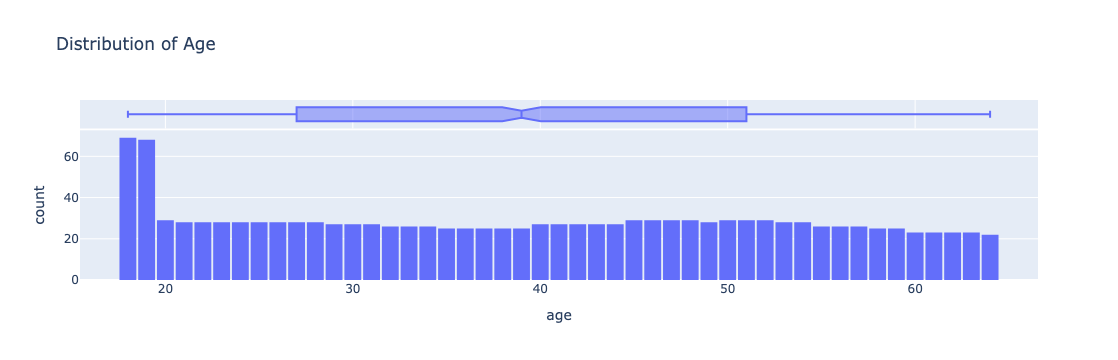

In [30]:
fig = px.histogram(df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

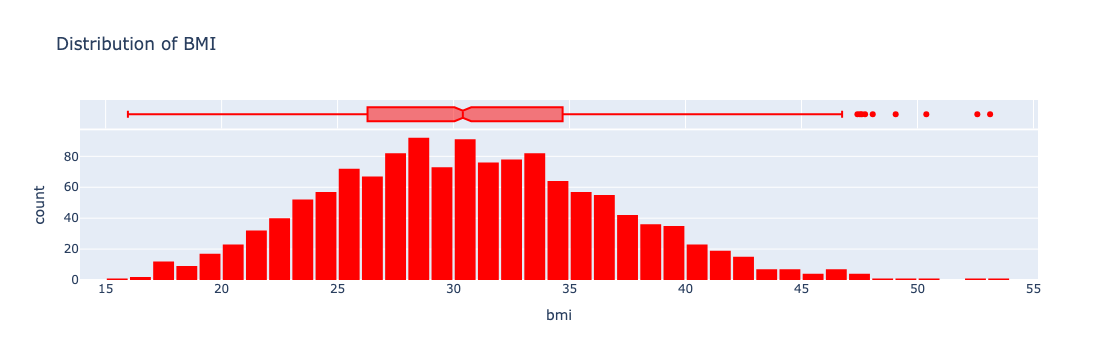

In [36]:
fig = px.histogram(df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

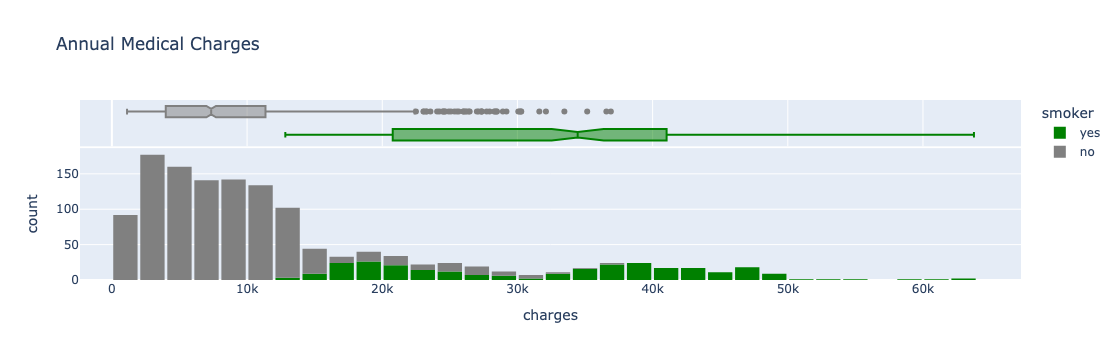

In [38]:
fig = px.histogram(df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Annual Medical Charges')
fig.update_layout(bargap=0.1)

fig.show()

In [46]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

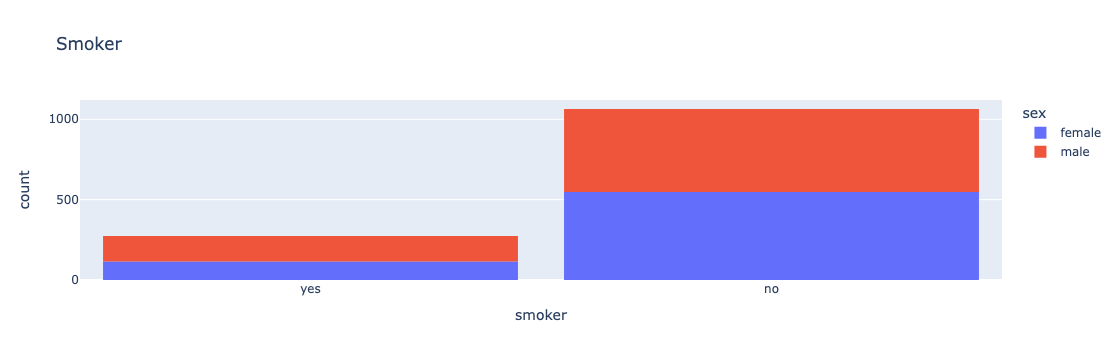

In [48]:
fig = px.histogram(df,x='smoker',color='sex',title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

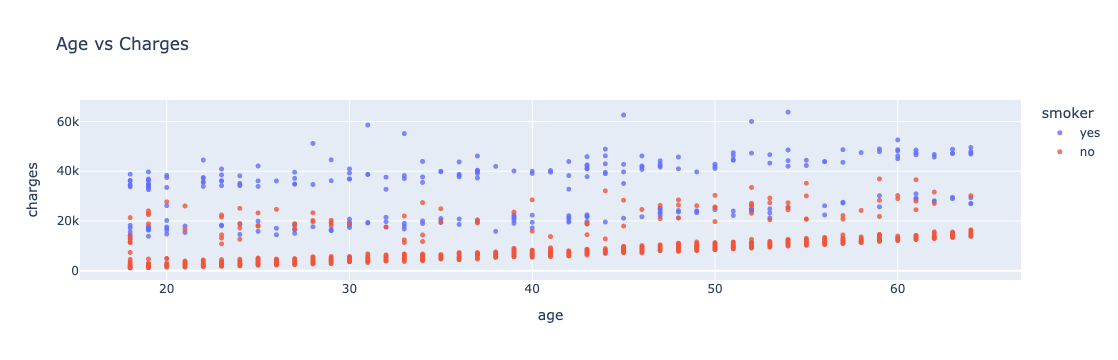

In [56]:
#Visualization of relationship of charges with another factors
#with age
fig=px.scatter(df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [60]:
#Visualization of relationship of charges with another factors
#with age
#Observing 3 clusters in Age vs Charges scatter plot
#seeing trend it is for smoker and non-smokers 
#In smoker light & heavy smoker clusters can be observed

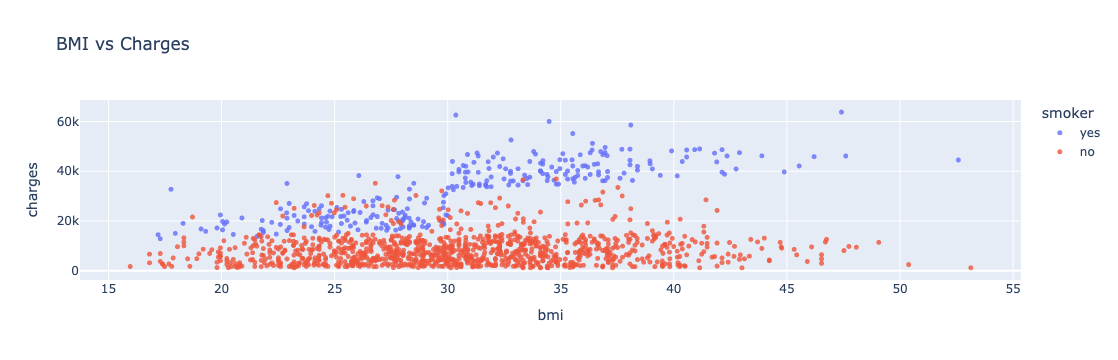

In [64]:
#Visualization of relationship of charges with another factors
#with BMI
fig=px.scatter(df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()
#It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. 
#However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.
#What other insights can you gather from the above graph?

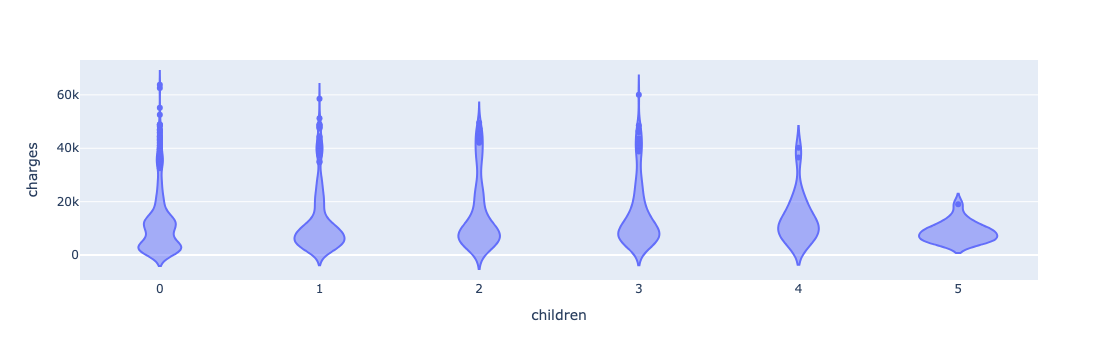

In [68]:
#Relationship btw children & charges
px.violin(df,x='children',y='charges')

In [72]:
#Expressing Relationship between charges and other factors using correlation
df.charges.corr(df.age)

0.2990081933306478

In [74]:
df.charges.corr(df.bmi)

0.19834096883362887

In [76]:
df.charges.corr(df.children)

0.06799822684790487

In [78]:
smoker_values={'no':0,'yes':1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [82]:
df.charges.corr(smoker_numeric)

0.7872514304984778

In [88]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [100]:
#We found out that smoker & age have strong correlation with charges
#now let's try to derive relationships only for non - smokers
non_smoker_df=df[df.smoker=='no']


<Figure size 1000x600 with 0 Axes>

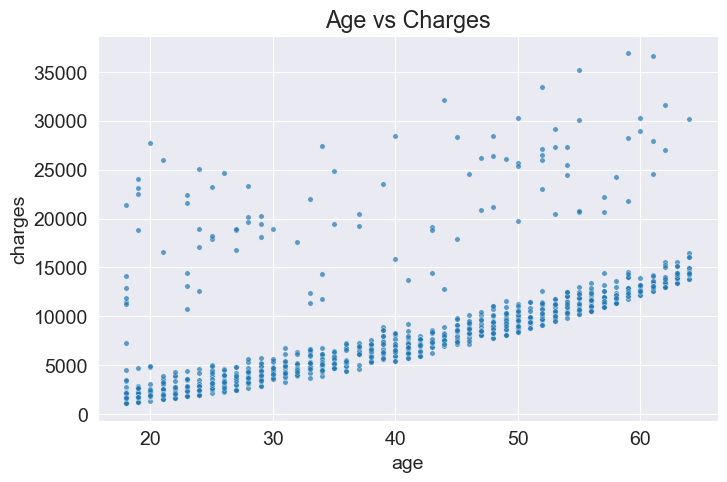

In [110]:

plt.clf() 
plt.figure(figsize=(8, 5)) 
plt.title('Age vs Charges')

sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

plt.show()  


In [112]:
from sklearn.linear_model import LinearRegression


In [114]:
model = LinearRegression()

In [122]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges


In [124]:
model.fit(inputs,targets)

LinearRegression()

In [136]:
model.predict(np.array([[23],[37],[61]]))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [144]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)

In [150]:
df.charges.corr(df.sex_code)

0.05729206220202533

In [152]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [156]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [158]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [160]:
df

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [162]:
from sklearn.preprocessing import StandardScaler

In [166]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [170]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [178]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values


In [184]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [186]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges
from sklearn.metrics import mean_squared_error
# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [192]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [194]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6463.643258900084


In [196]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5995.741956399201
